# In this Notebook we going to make a simple multiclass classification model

This time we use tensorflow fashion mnist dataset

In [76]:
# import the lib
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


In [43]:
# the dataset is already install in to traing and the test set
# lets load the dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [44]:
train_data.shape

(60000, 28, 28)

In [45]:
# lets see the first sample (photo) and shape of the array image
# this is we can see as an array. this photo pixel details is showing as a two dementonal array
print("array shape is:", train_data[0].shape)
print("image is :" , train_data[0])

array shape is: (28, 28)
image is : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   

In [46]:
# lets see the labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

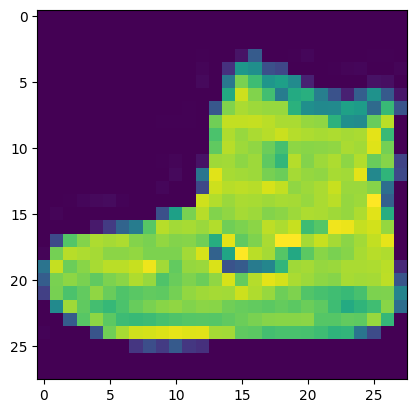

In [47]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

This dataset contain 10 classes images

In [48]:
# lets difine the classes
class_names = ["T shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'T shirt')

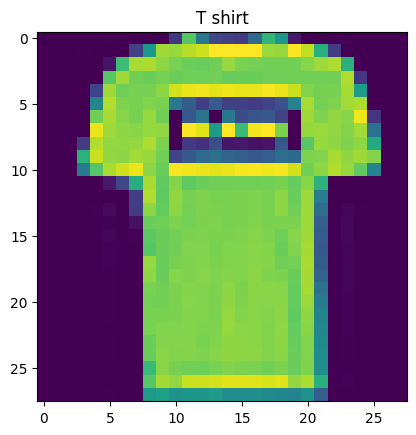

In [49]:
# lets plot the image with related label(random index)
index = np.random.randint(0,10)

# plot the image
plt.imshow(train_data[index])
plt.title(class_names[train_labels[index]])

In [50]:
# we want to normalize the data to feed the neural network
print(train_data.max(), train_data.min())

255 0


In [51]:
# so lets normalize the data
train_data_normalize = train_data/255
test_data_normalize  = test_data/255

In [52]:
train_data_normalize[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [53]:
# our dense layer alwys expect 1D arrays but our images ara 2D array so we need to flatten ir before feed to the dense layers.
# this is example to do 2D array to 1D array
array = np.array([[1, 2, 3, 4],
                  [2, 3, 4, 5],
                  [4, 5, 6, 7]])

array.flatten()

array([1, 2, 3, 4, 2, 3, 4, 5, 4, 5, 6, 7])

In [54]:
# lets create a model

# set random seed
tf.random.set_seed(42)

# Create a model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # dense layers expect 1D input so our image is 2D so it want to flatten and feed to the dense layer
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "sigmoid")
])

# compile the model
model_0.compile(loss = "sparse_categorical_crossentropy", # we use this loss function becouse our labels are not one hot encoded. this contain integrs
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])


In [55]:
# Fit the model
history = model_0.fit(train_data,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8683 - accuracy: 0.4261 - val_loss: 1.1132 - val_accuracy: 0.5417
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9205 - accuracy: 0.6462 - val_loss: 0.7739 - val_accuracy: 0.7039
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7332 - accuracy: 0.7114 - val_loss: 0.7526 - val_accuracy: 0.6979
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7038 - accuracy: 0.7195 - val_loss: 0.7021 - val_accuracy: 0.7203
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6789 - accuracy: 0.7259 - val_loss: 0.7344 - val_accuracy: 0.7168
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6670 - accuracy: 0.7289 - val_loss: 0.7028 - val_accuracy: 0.7170
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6503 - accuracy: 0.7361 - val_loss: 0.6769 - val_accuracy:

In [56]:
# lets create a model

# set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # dense layers expect 1D input so our image is 2D so it want to flatten and feed to the dense layer
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "sigmoid")
])

# compile the model
model.compile(loss = "sparse_categorical_crossentropy", # we use this loss function becouse our labels are not one hot encoded. this contain integrs
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])


In [64]:
history_2 = model.fit(train_data_normalize,
                      train_labels,
                      epochs=10,
                      validation_data =(test_data_normalize, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2907 - accuracy: 0.8921 - val_loss: 0.3649 - val_accuracy: 0.8685
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2837 - accuracy: 0.8949 - val_loss: 0.4022 - val_accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2793 - accuracy: 0.8967 - val_loss: 0.3793 - val_accuracy: 0.8628
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2751 - accuracy: 0.8984 - val_loss: 0.3879 - val_accuracy: 0.8623
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2707 - accuracy: 0.9003 - val_loss: 0.3755 - val_accuracy: 0.8696
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9011 - val_loss: 0.3741 - val_accuracy: 0.8674
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2643 - accuracy: 0.9023 - val_loss: 0.3920 - val_accurac

<Axes: title={'center': 'normalize data'}>

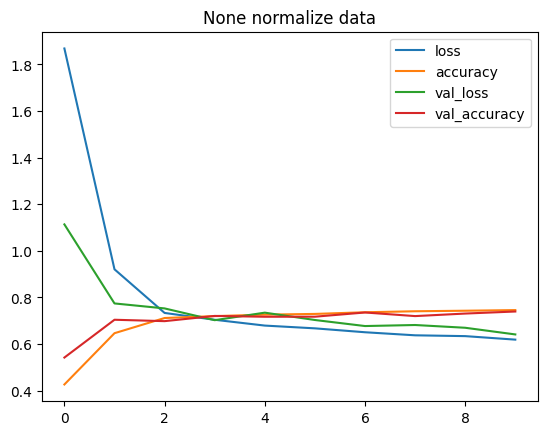

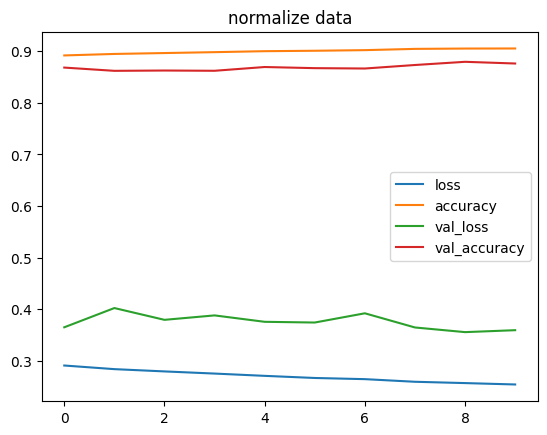

In [65]:
# lets plot the history chart of the normalize data and without normalize data
import pandas as pd

# Plot none normalized loss curve
pd.DataFrame(history.history).plot(title="None normalize data")

# plot normalized loss curve
pd.DataFrame(history_2.history).plot(title="normalize data")

after normlize the data we acchive 0.8531 val_accuracy within 10 epochs. but without normalize it didnt acchive that val_accuracy after 40 epochs also. neural networks most like to work with normalize data it men 0-1

In [66]:
# lets evaluate the model
model.evaluate(test_data_normalize, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3593 - accuracy: 0.8764


[0.3592503070831299, 0.8763999938964844]

In [67]:
# lets get the first 10 predictions
y_probs = model.predict(test_data_normalize)
y_probs[:10]


313/313 [==============================] - 0s 2ms/step


array([[8.41197819e-02, 2.65071285e-04, 3.12686060e-03, 2.13690641e-04,
        6.20365317e-05, 2.24501982e-01, 1.12708183e-02, 9.83602047e-01,
        3.57712293e-03, 9.99547541e-01],
       [9.98632669e-01, 8.07045610e-04, 9.99999285e-01, 3.24069150e-02,
        9.99933362e-01, 1.32696365e-09, 9.99787927e-01, 1.47412287e-08,
        4.95128602e-01, 7.17974672e-06],
       [3.02321494e-01, 1.00000000e+00, 6.62838807e-03, 4.16514605e-01,
        1.33081689e-01, 2.21229675e-05, 1.96604012e-03, 1.20239093e-07,
        2.79347860e-05, 4.49125054e-07],
       [1.40218630e-01, 9.99998748e-01, 3.33450921e-02, 2.60522544e-01,
        6.23119920e-02, 1.49263185e-03, 1.16362013e-02, 2.69125877e-08,
        2.73137630e-07, 1.83739234e-03],
       [9.97260332e-01, 2.44625565e-03, 9.93646324e-01, 8.60187709e-01,
        9.68643546e-01, 1.04701076e-06, 9.97182071e-01, 1.02656835e-04,
        5.26358306e-01, 7.81430645e-05],
       [8.17285120e-01, 9.99998748e-01, 6.31751046e-02, 3.15408915e-01,
   

In [68]:
# lets get the predictions using the probability array
y_preds = y_probs.argmax(axis=1)
y_preds[:20]

array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 2, 8, 0])

In [69]:
# lets get the real 20 labels for compaire
test_labels[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0],
      dtype=uint8)

In [70]:
df = pd.DataFrame({"real value":test_labels[:20], "predicted value":y_preds[:20]})
df

,real value,predicted value
0,9,9
1,2,2
2,1,1
3,1,1
4,6,0
5,1,1
6,4,4
7,6,6
8,5,5
9,7,7


As the data frame we can think our model is perform well. but we can improve it more

Now lets have the confusion metrix

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[893,   2,   9,  27,   5,   0,  55,   0,   8,   1],
       [  3, 961,   3,  24,   6,   0,   2,   0,   1,   0],
       [ 28,   1, 737,  14, 152,   0,  60,   1,   7,   0],
       [ 33,   7,   8, 902,  29,   0,  14,   0,   7,   0],
       [  0,   0,  61,  35, 848,   0,  55,   0,   1,   0],
       [  0,   0,   0,   1,   0, 952,   0,  30,   0,  17],
       [191,   2,  75,  30,  99,   0, 587,   0,  15,   1],
       [  0,   0,   0,   0,   0,  14,   0, 962,   1,  23],
       [  9,   0,   2,   6,   4,   3,   4,   2, 970,   0],
       [  2,   0,   0,   0,   0,   8,   1,  34,   0, 955]])

In [77]:
# download helper function
!wget "https://raw.githubusercontent.com/prvpitawala/ML_help/main/helper_functions.py"
from helper_functions import make_confusion_matrix

--2023-08-24 19:19:40--  https://raw.githubusercontent.com/prvpitawala/ML_help/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-24 19:19:40 (86.1 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



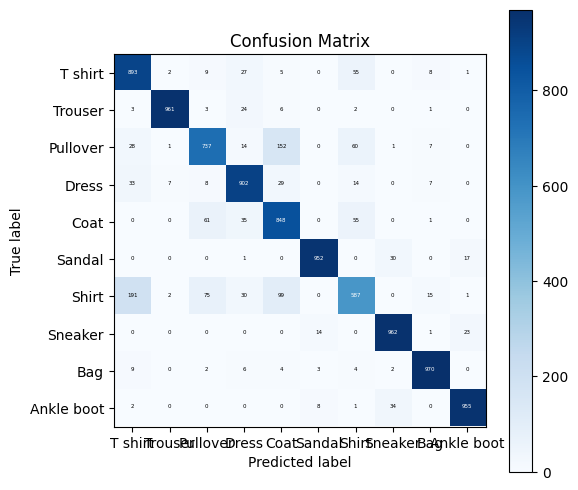

In [81]:
make_confusion_matrix(y_true = test_labels, y_pred = y_preds, classes=class_names, figsize=(6, 6), text_size=4)

if we use this chart we can find what time our model getting confused. according to this table my model is getting confused about when idintfy the shirts and the T shirts. this time that modle is getting confused. So that time this model can give wrong predictions

Now lets see our model summary

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


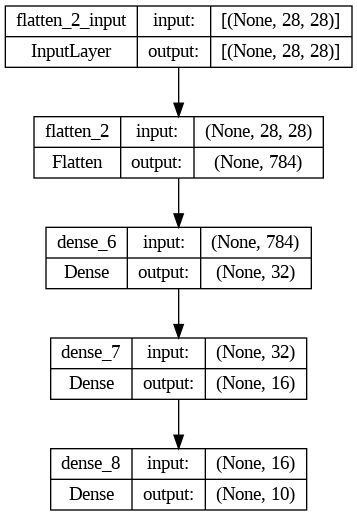

In [85]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

End